# 11Be particle gun generator

Let's do some nuclear particle emission



In [77]:
using Plots,Random

## Spherical neutron emission

We generate a `sampleSize` of  spherical coordinates *P*, $\theta$, and $\phi$ using random numbers

In [78]:
#neutron particle gun 

sampleSize=1000


1000

Generate coordinates and get ready to store in list of three-coordinate vectors

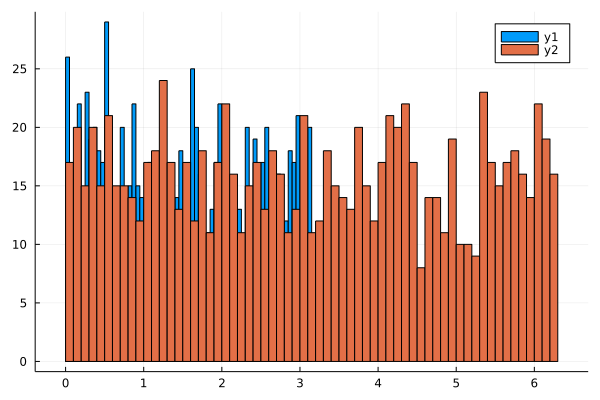

In [79]:

#random theta=[0,pi]

theta=pi*rand(sampleSize)

#random phi=[0,2pi]

phi=2*pi*rand(sampleSize)

# neutron energy and momentum distribution

mn=1000;mb=10000
E = 0.2 .+ 0.01.*randn(sampleSize)
pn = sqrt.((2*mn*mb)/(mb+mn) .* E)

histogram(theta,bins=100)
histogram!(phi,bins=100)

Trying to refactor in a list of three-coordinate vectors

Now we can add gaussian energy and momentum

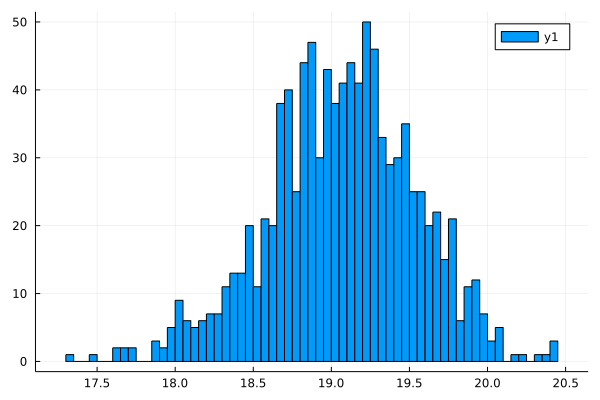

In [80]:


 histogram(pn,bins=100)


With all three values defined we store them in the `particleSample` dictionary, with each variable in its own collection.

**Initially storing each coordinate in it's own vector. Need to refactor them in  a vector of three-coordinate vectors to do math!**

In [81]:

particleSample = Dict{String,Any}(
    "neutron"=>Dict{String,Any}("e"=>pn.^2 ./2*mn, "p"=>pn, "theta"=>theta, "phi"=> phi),
    "10be"=>Dict{String,Any}("e"=>pn.^2 ./ 2*mb, "p"=>pn, "theta"=> 3.1415.+theta, "phi"=> .-phi)   
        );

Now that we have the particle guns defined we can do fun things like breaking down the 10Be into another neutron plus 9Be. First we dump the 10be 3 momentum in vectors and create a new 3 momentum in the 10Be CM frame

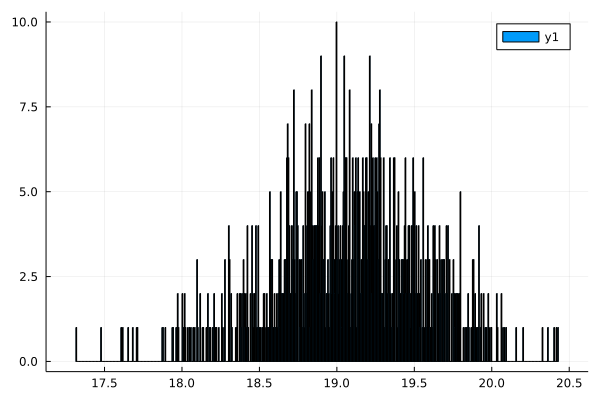

In [82]:
pVec=[]; 
ps=get(get(particleSample,"neutron",3),"p",3) 
thetas=get(get(particleSample,"neutron",3),"theta",3) 
phis=get(get(particleSample,"neutron",3),"phi",3) 

for i in [1:sampleSize] push!(pVec,[ps[i],thetas[i],phis[i]]) end

histogram(ps,nbins=1000)